## IPL Second Innings Score Prediction

 

   IPL is very popular in India. The match of ipl has 20-20 overs, if we can estimate the score of the first innings. Although it is difficult to predict what will happen in cricket, this project would give us an estimate based on past matches.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import joblib
import time
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df_auction= pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\auction.csv")
df_delivery = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\deliveries.csv")
df_ipl = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\ipl.csv")
df_ball = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\IPL_Matches_2008_2022.csv")
df_matches= pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\matches.csv")
df_ipl_matches = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\IPL_Matches_2008_2022.csv")

In [3]:
# estimate the score of the first innings


In [4]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df_ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


    Select the batting team from the dropdown menu.
    Select the bowling team from the dropdown menu.
    Select the overs greater than or equal to 5
    Select the venue
    Enter the  current score
    Enter the current wicket
    Enter runs scored in previous 5 overs
    Enter wickets taken in previous 5 overs
    Click on the "Predict Probability" button to see the predicted first inning score.


In [7]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
df_matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df_ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

#### filtering Second Inning score.

In [10]:
df_delivery = df_delivery[df_delivery['inning'] == 2]

In [11]:
df_matches_copy = df_matches[['id','city']]
df_delivery_copy = df_delivery[['match_id','batting_team','bowling_team']]
df_ipl_copy = df_ipl[['mid','runs_last_5','wickets_last_5','wickets','runs','overs','total']]

In [12]:
df_matches_merge = pd.merge(df_matches_copy,df_delivery_copy,left_on = 'id',right_on='match_id')

In [13]:
df = pd.merge(df_matches_merge,df_ipl_copy,left_on='id',right_on='mid')

In [14]:
df_matches_merge.duplicated().sum()

85486

In [15]:
df.duplicated().sum()

8585025

In [16]:
df1 = df.drop(['id','match_id','mid'],axis=1)

In [17]:
df1.duplicated().sum()

8585037

In [18]:
df1 = df1.drop_duplicates()

In [19]:
df1.shape

(75759, 9)

# Data Cleaning

In [20]:
def data_cleaning(df1):

    df1.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                     'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                     'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                    ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


data_cleaning(df1)

In [21]:
df1 = df1.rename({'Maharashtra Cricket Association Stadium':"Subrata Roy Sahara Stadium"},axis=1)

In [22]:
df1.head()

,city,batting_team,bowling_team,runs_last_5,wickets_last_5,wickets,runs,overs,total
0,Hyderabad,RCB,SRH,1,0,0,1,0.1,222
1,Hyderabad,RCB,SRH,1,0,0,1,0.2,222
2,Hyderabad,RCB,SRH,2,0,0,2,0.2,222
3,Hyderabad,RCB,SRH,2,0,0,2,0.3,222
4,Hyderabad,RCB,SRH,2,0,0,2,0.4,222


In [23]:
import matplotlib.pyplot as plt

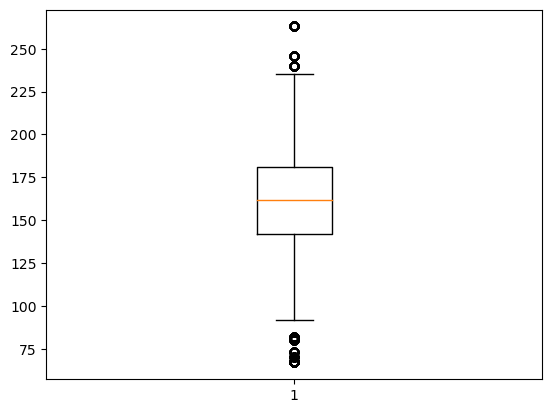

In [24]:
plt.boxplot(df1['total'])
plt.show()

In [25]:
df1.columns

Index(['city', 'batting_team', 'bowling_team', 'runs_last_5', 'wickets_last_5',
       'wickets', 'runs', 'overs', 'total'],
      dtype='object')

In [26]:
df1 = df1.dropna()

In [27]:
df1.shape

(74886, 9)

In [28]:
df1 = df1[df1['overs']>=5]

In [29]:
X = df1.drop('total',axis=1)
y = df1['total']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(41906, 8) (41906,)
(13969, 8) (13969,)


In [32]:
# def data_encoding()

from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [33]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [35]:
def label_encoding(train_df,test_df):
    label_encoder = LabelEncoder()
    for col in train_df:
        train_df[col] = label_encoder.fit_transform(train_df[col])
        test_df[col] = label_encoder.transform(test_df[col])

    return train_df,test_df
X_train_transform, X_test_transform = label_encoding(X_train_cat,X_test_cat)

In [36]:
# encoder = OneHotEncoder(drop='first',sparse_output=False)
# X_train_transfromed = pd.DataFrame(encoder.fit_transform(X_train_cat),
# columns = encoder.get_feature_names_out(X_train_cat.columns),
#                                   index=X_train_cat.index)

In [37]:
# X_test_transformed = pd.DataFrame(encoder.transform(X_test_cat),
#                                  columns = encoder.get_feature_names_out(X_test_cat.columns),
#                                  index = X_test_cat.index)

In [38]:
X_train_transform

,city,batting_team,bowling_team
1898148,11,6,9
7010137,27,9,0
1640018,4,1,4
8109984,6,3,6
8015683,13,7,12
...,...,...,...
7159908,6,11,6
8123398,2,12,9
6582788,28,9,4
6791692,9,0,2


In [39]:
X_test_transform

,city,batting_team,bowling_team
707710,17,12,3
7963906,21,4,7
781297,2,7,4
861790,20,4,1
2947188,7,7,0
...,...,...,...
2711791,1,11,1
7837582,21,11,12
3345725,21,8,6
2500857,1,2,11


In [40]:
X_train_transform = pd.concat([X_train_num,X_train_transform],axis=1)


In [41]:
X_train_transform


,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
1898148,39,3,3,50,5.5,11,6,9
7010137,32,2,5,55,10.1,27,9,0
1640018,32,2,3,105,11.6,4,1,4
8109984,39,0,0,47,6.3,6,3,6
8015683,35,2,5,136,16.1,13,7,12
...,...,...,...,...,...,...,...,...
7159908,53,1,1,58,6.1,6,11,6
8123398,43,0,1,58,7.2,2,12,9
6582788,46,1,2,84,10.3,28,9,4
6791692,34,0,2,68,9.5,9,0,2


In [42]:
X_test_transform = pd.concat([X_test_num,X_test_transform],axis=1)

### Algorithms:-

1. Linear Regression
2. Support Vector Regression
3. Decision Tree Regression
4. Random Forest Regression
5. Artificial Neural Network
4. Recursive Neural Network

In [43]:
X_train_transform=X_train_transform.dropna()

In [44]:
X_train_transform.head()

,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
1898148,39,3,3,50,5.5,11,6,9
7010137,32,2,5,55,10.1,27,9,0
1640018,32,2,3,105,11.6,4,1,4
8109984,39,0,0,47,6.3,6,3,6
8015683,35,2,5,136,16.1,13,7,12


In [45]:
X_test_transform.head()

,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
707710,35,1,1,80,12.2,17,12,3
7963906,21,1,4,70,14.2,21,4,7
781297,25,2,6,88,16.1,2,7,4
861790,49,1,4,118,14.4,20,4,1
2947188,36,1,1,92,12.1,7,7,0


In [46]:
from sklearn.linear_model import ElasticNet

In [47]:

#
pipelines = {
    'linear': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', DecisionTreeRegressor())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', RandomForestRegressor())
    ])
}

# Define param_grids
param_grids = {
    'linear':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()]
        }
    
    ],
    'decision_tree':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()],
            'regression__max_depth':[i for i in range(1,50,3)],
            'regression__max_leaf_nodes':[i for i in range(2,10)]
        }
    ],
    'random_forest':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()],
        }
    ]
}



linear
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Score:  0.6435129212533784
Test Score:  0.6419877273313528
Mean Squared Error (MSE):  301.1994823978179
R2 Score:  0.6419877273313528
Root Mean Squared Error (RMSE):  17.355099607833367
Fit Time:  1.6046173572540283
Predict Time:  0.009886741638183594
Model Size:  1726


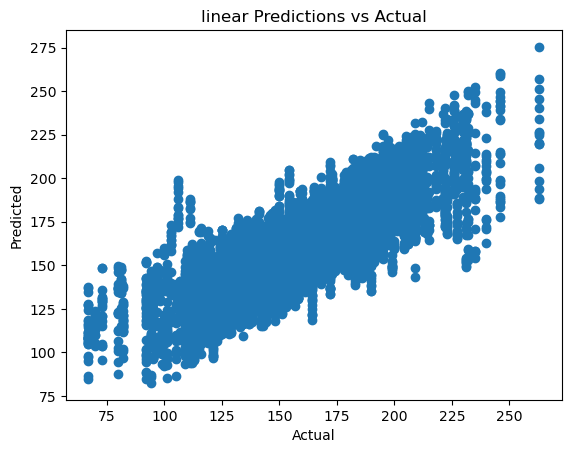

decision_tree
Fitting 5 folds for each of 272 candidates, totalling 1360 fits
Train Score:  0.42672587777833415
Test Score:  0.4314325660040753
Mean Squared Error (MSE):  478.3417494358578
R2 Score:  0.4314325660040753
Root Mean Squared Error (RMSE):  21.871025340295727
Fit Time:  568.639270067215
Predict Time:  0.04811263084411621
Model Size:  3432


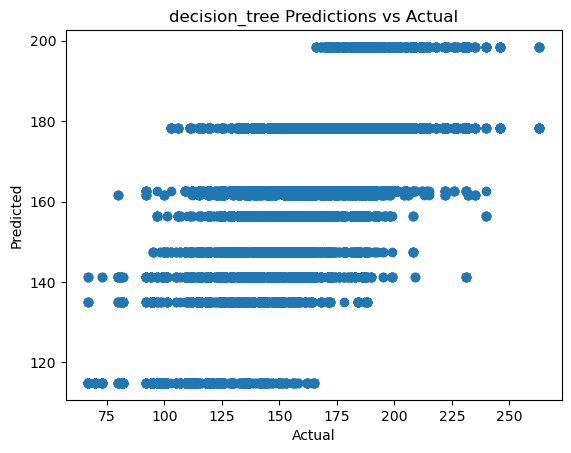

random_forest
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Score:  0.9318416406010079
Test Score:  0.9459306337173496
Mean Squared Error (MSE):  45.48912532108996
R2 Score:  0.9459306337173496
Root Mean Squared Error (RMSE):  6.744562648614806
Fit Time:  1047.3432483673096
Predict Time:  3.21024751663208
Model Size:  165186999


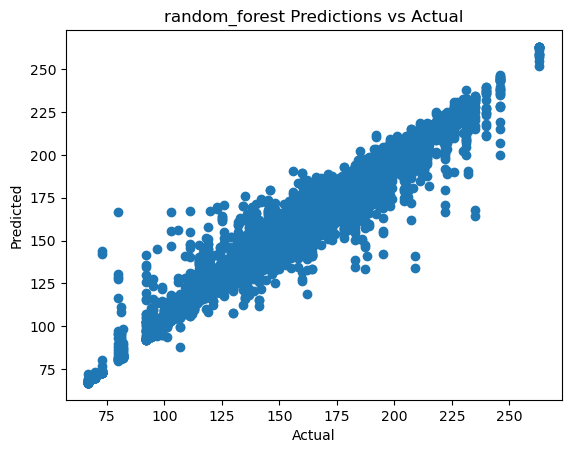

In [48]:
best_models = {}
for algo in pipelines.keys():
    print(algo)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                              param_grid=param_grids[algo],
                              cv=5,
                              return_train_score=True,
                              verbose=1)
    
    # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train_transform, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test_transform)
    end_predict_time = time.time()

    # Saving the best models
    joblib.dump(grid_search.best_estimator_, f'first_inning_models/{algo}.pkl')
    model_size = os.path.getsize(f'first_inning_models/{algo}.pkl')

    # Evaluation metrics
    train_score = grid_search.best_score_
    test_score = grid_search.score(X_test_transform, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mse)

    # Print evaluation metrics
    print('Train Score: ', train_score)
    print('Test Score: ', test_score)
    print('Mean Squared Error (MSE): ', mse)
    print('R2 Score: ', r2)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)

    # Plot predictions vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{algo} Predictions vs Actual')
    plt.show()


In [49]:
X_train_transform

,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
1898148,39,3,3,50,5.5,11,6,9
7010137,32,2,5,55,10.1,27,9,0
1640018,32,2,3,105,11.6,4,1,4
8109984,39,0,0,47,6.3,6,3,6
8015683,35,2,5,136,16.1,13,7,12
...,...,...,...,...,...,...,...,...
7159908,53,1,1,58,6.1,6,11,6
8123398,43,0,1,58,7.2,2,12,9
6582788,46,1,2,84,10.3,28,9,4
6791692,34,0,2,68,9.5,9,0,2


In [50]:
X_train_transform.bowling_team.unique()

array([ 9,  0,  4,  6, 12, 11,  8,  7,  2,  3,  1, 10,  5])

In [51]:
X_train_transform

,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
1898148,39,3,3,50,5.5,11,6,9
7010137,32,2,5,55,10.1,27,9,0
1640018,32,2,3,105,11.6,4,1,4
8109984,39,0,0,47,6.3,6,3,6
8015683,35,2,5,136,16.1,13,7,12
...,...,...,...,...,...,...,...,...
7159908,53,1,1,58,6.1,6,11,6
8123398,43,0,1,58,7.2,2,12,9
6582788,46,1,2,84,10.3,28,9,4
6791692,34,0,2,68,9.5,9,0,2


In [52]:
X_train_cat.sort_values(by='bowling_team',ascending=True)['bowling_team'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [53]:
X_train_transform.city.max()

29

In [54]:
X_train_transform

,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
1898148,39,3,3,50,5.5,11,6,9
7010137,32,2,5,55,10.1,27,9,0
1640018,32,2,3,105,11.6,4,1,4
8109984,39,0,0,47,6.3,6,3,6
8015683,35,2,5,136,16.1,13,7,12
...,...,...,...,...,...,...,...,...
7159908,53,1,1,58,6.1,6,11,6
8123398,43,0,1,58,7.2,2,12,9
6582788,46,1,2,84,10.3,28,9,4
6791692,34,0,2,68,9.5,9,0,2
